In [1]:
import pickle
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from dist_rsa.debugging.low_dim.l1 import l1_model
%matplotlib inline


/home/rcohngordon/dist-rsa/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
"""
THE VECTORS I'M USING
real_vecs["swimmer"]=np.asarray([0.0,1.0])
real_vecs["shark"]=np.asarray([1.0,1.0])
real_vecs["man"]=np.asarray([0.0,0.0])
real_vecs["vicious"]=np.asarray([2.0,0.0])
real_vecs["swims"]=np.asarray([0.0,3.0])


real_vecs["child"]=np.asarray([0.1,-1.0])
real_vecs["nightmare"]=np.asarray([1.0,1.0])
real_vecs["wonder"]=np.asarray([1.0,-1.0])
"""

'\nTHE VECTORS I\'M USING\nreal_vecs["swimmer"]=np.asarray([0.0,1.0])\nreal_vecs["shark"]=np.asarray([1.0,1.0])\nreal_vecs["man"]=np.asarray([0.0,0.0])\nreal_vecs["vicious"]=np.asarray([2.0,0.0])\nreal_vecs["swims"]=np.asarray([0.0,3.0])\n\n\nreal_vecs["child"]=np.asarray([0.1,-1.0])\nreal_vecs["nightmare"]=np.asarray([1.0,1.0])\nreal_vecs["wonder"]=np.asarray([1.0,-1.0])\n'

In [2]:
def titrate(size,amount,l1_sig1,subj, quds,only_trivial,pred,just_s1,possible_utterances,mixture_variational,discrete,just_l0=False,sig1=0.1,sig2=0.1,variational=False,step_size=1e-3):
    results = l1_model(subj=subj,
                             pred=pred,
                             sig1=sig1,
                             sig2=sig2,
                             l1_sig1=l1_sig1,
                             resolution=(size,amount),
                             quds=quds,
                             only_trivial=only_trivial,
                             just_s1=just_s1,
                             just_l0=just_l0,
                             possible_utterances=possible_utterances,
                             discrete=discrete,
                             variational=True,
                             step_size=step_size,
                             mixture_variational=mixture_variational,
                            )


#     n=np.asarray([1 if x[1]==3 or x[0]==3 else 0 for x in results[1]])
# #     print(results[0].shape)
# #     print(n.shape)
#     print("\n\n\nRESULTS\n\n\n")
#     print(n)
#     n=np.reshape(n,(size*2,size*2))
    
#     hm = pnd.DataFrame(n,columns=np.arange(-size,size)*amount,index=np.arange(-size,size)*amount)
#     seaborn.heatmap(hm)
    
#     return None
    if mixture_variational:
#         print(results.inference_params.heatmap)
        hm = pnd.DataFrame((results.inference_params.heatmap),columns=np.arange(-size,size+1)*amount,index=np.arange(-size,size+1)*amount)
#         return hm
#         seaborn.heatmap(hm)
    if discrete:
#         if not just_s1:
#             print("QUDS: ", list(zip(quds,np.exp(results[-1]))))
#         print(results.tf_results[0])
        hm = pnd.DataFrame(results.inference_params.heatmap,columns=np.arange(-size,size+1)*amount,index=np.arange(-size,size+1)*amount)
#         print(hm)

#         seaborn.heatmap(hm)
    return hm,results.tf_results[1]
#     else: print("QUDS",[(x,np.exp(y)) for (x,y) in results[-1]])
#         results[0][size,:]=0.75
#         results[0][:,size]=0.75
#         results[0][size,size+3]=2
#         results[0][size,size+1]=2




UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 2
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_1:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
subspace_mean -3.1245872e-07
orthogonal_dims Tensor("strided_slice_206:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_212:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_2:0", shape=(2,), dtype=float32) Tensor("concat_2:0", shape=(2,), dtype=float32)
['vicious'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
subspace_mean 0.7335206
orthogonal_dims Ten

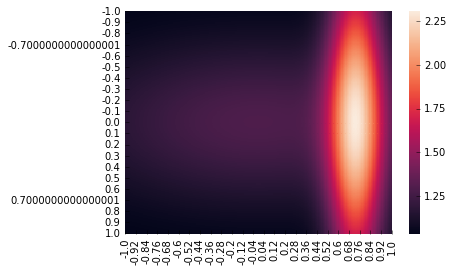

DISCRETE:
DISCRETE QUDS: [(['swims'], 0.69144684), (['vicious'], 0.30855486)]


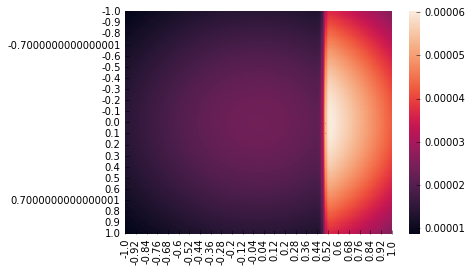

In [3]:
hm_mix,quds_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc,quds_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 2
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 2 [['nightmare'], ['swims']]
quds 2
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_15:0", shape=(40401, 2), dtype=float32)
['nightmare'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
subspace_mean 0.9899574
orthogonal_dims Tensor("strided_slice_1689:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_1728:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_18:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_43:0", shape=(2,), dtype=float32) Tensor("concat_20:0", shape=(2,), dtype=float32)
['swims'] CURRENT QUD
(2, 2, 2) (2, 1, 2)
(2, 2) shape out
subspace_mean -3.1245872e-07
orthogo

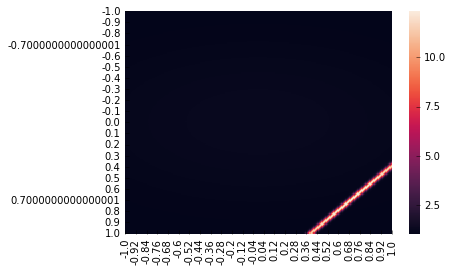

DISCRETE:
DISCRETE QUDS: [(['swims'], 0.9553485), (['nightmare'], 0.04465728)]


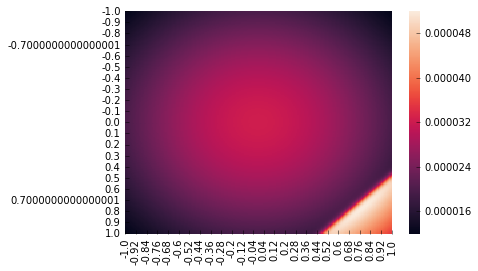

In [7]:
hm_mix,quds_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['nightmare','swims'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc,quds_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['nightmare','swims'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 3
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 3 [['swims'], ['vicious'], ['wonder']]
quds 3
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_19:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
subspace_mean -3.1245872e-07
orthogonal_dims Tensor("strided_slice_2115:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_2164:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_24:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_56:0", shape=(2,), dtype=float32) Tensor("concat_26:0", shape=(2,), dtype=float32)
['vicious'] CURRENT QUD
(3, 2, 2) (3, 1, 2)
(3, 2) shape out
subspace_mean 0.7335206

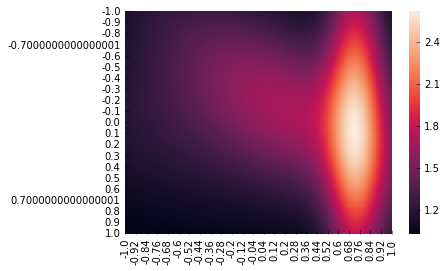

DISCRETE:
DISCRETE QUDS: [(['wonder'], 0.50198257), (['swims'], 0.3443511), (['vicious'], 0.15366504)]


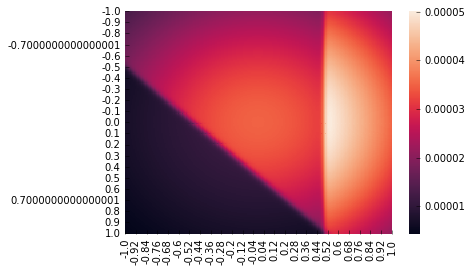

In [8]:
hm_mix,quds_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious','swims','wonder'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc,quds_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious','swims','wonder'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

UTTERANCES:
 ['man', 'shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 3 possible utterances and 2
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 2 [['swims'], ['vicious']]
quds 2
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_26:0", shape=(40401, 2), dtype=float32)
['swims'] CURRENT QUD
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
subspace_mean 0.7297014
orthogonal_dims Tensor("strided_slice_2959:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_3024:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_33:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_78:0", shape=(2,), dtype=float32) Tensor("concat_35:0", shape=(2,), dtype=float32)
['vicious'] CURRENT QUD
(2, 3, 2) (2, 1, 2)
(2, 3) shape out
subspace_mean 0.7373383
orthogona

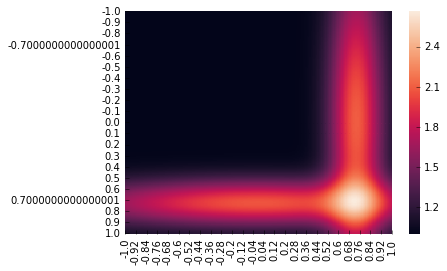

DISCRETE:
DISCRETE QUDS: [(['vicious'], 0.65951586), (['swims'], 0.34048116)]


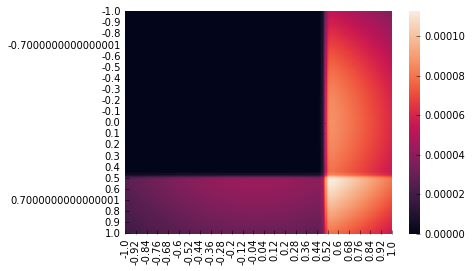

In [11]:
hm_mix,quds_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc,quds_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious','swims'],possible_utterances=["shark","swimmer","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['vicious']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_21:0", shape=(40401, 2), dtype=float32)
['vicious'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
subspace_mean 0.7335206
orthogonal_dims Tensor("strided_slice_1908:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_1964:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_24:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_48:0", shape=(2,), dtype=float32) Tensor("concat_26:0", shape=(2,), dtype=float32)
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
stacked_worlds,qud_distribution Tensor("stack_42:0", shape=(1, 201, 201),

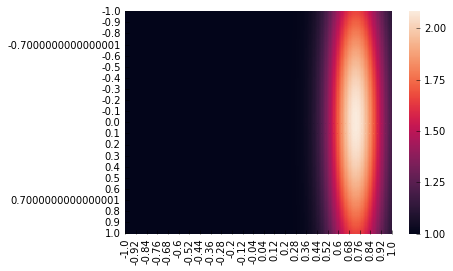

DISCRETE:
DISCRETE QUDS: [(['vicious'], 0.0)]


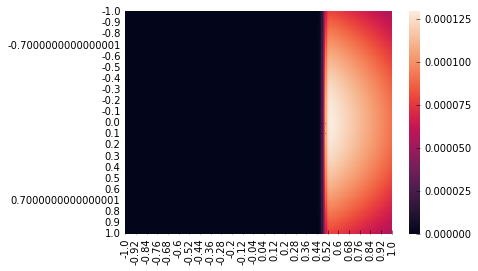

In [17]:

hm_mix,quds_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc,quds_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
print("MIXTURE QUDS:",quds_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
print("DISCRETE QUDS:",quds_disc)
plt.show()

UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate swimmer
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['vicious']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_13:0", shape=(40401, 2), dtype=float32)
['vicious'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
subspace_mean -0.21067297
orthogonal_dims Tensor("strided_slice_1459:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_1482:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_10:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_27:0", shape=(2,), dtype=float32) Tensor("concat_17:0", shape=(2,), dtype=float32)
UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate swimmer
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_siz

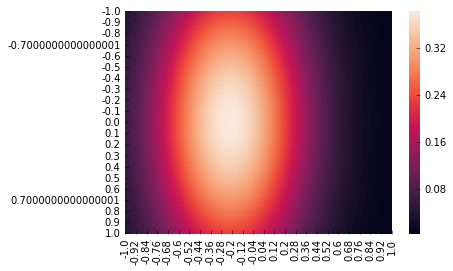

DISCRETE:


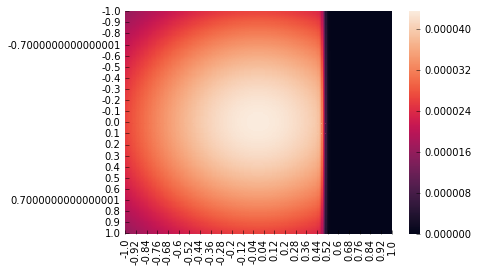

In [11]:

hm_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='swimmer',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='swimmer',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
plt.show()



UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['nightmare']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_9:0", shape=(40401, 2), dtype=float32)
['nightmare'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
subspace_mean 0.9899574
orthogonal_dims Tensor("strided_slice_1046:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_1064:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_8:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_22:0", shape=(2,), dtype=float32) Tensor("concat_14:0", shape=(2,), dtype=float32)
UTTERANCES:
 ['shark', 'swimmer']
subject: ['man']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.

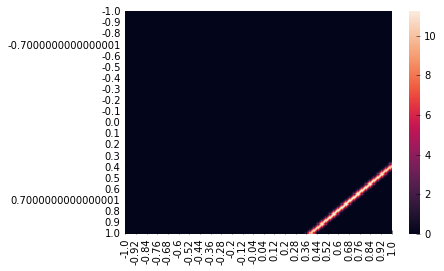

DISCRETE:


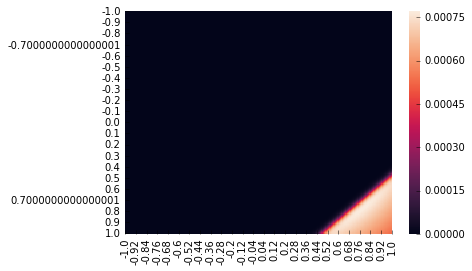

In [8]:

hm_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="man",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
plt.show()

UTTERANCES:
 ['shark', 'swimmer']
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['vicious']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_15:0", shape=(40401, 2), dtype=float32)
['vicious'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
subspace_mean 0.7362113
orthogonal_dims Tensor("strided_slice_1669:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_1695:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_12:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_32:0", shape=(2,), dtype=float32) Tensor("concat_20:0", shape=(2,), dtype=float32)
UTTERANCES:
 ['shark', 'swimmer']
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 

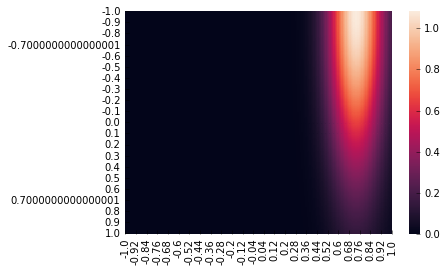

DISCRETE:


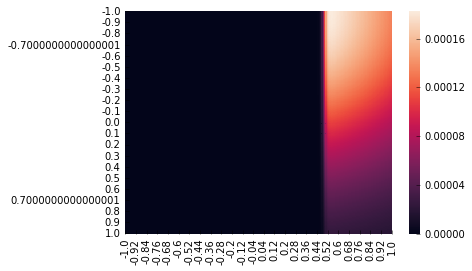

In [12]:



hm_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="child",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="child",quds=['vicious'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
plt.show()


UTTERANCES:
 ['shark', 'swimmer']
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['nightmare']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_17:0", shape=(40401, 2), dtype=float32)
['nightmare'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
subspace_mean 0.98975927
orthogonal_dims Tensor("strided_slice_1879:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_1908:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_14:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_37:0", shape=(2,), dtype=float32) Tensor("concat_23:0", shape=(2,), dtype=float32)
UTTERANCES:
 ['shark', 'swimmer']
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_

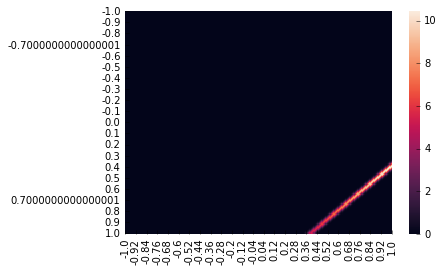

DISCRETE:


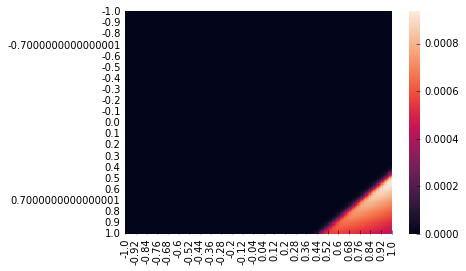

In [ ]:
hm_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="child",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="child",quds=['nightmare'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
plt.show()

In [ ]:
hm_mix = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="child",quds=['wonder'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=True,discrete=False)
hm_disc = titrate(size=100,amount=0.01,l1_sig1=1.0,subj="child",quds=['wonder'],possible_utterances=["shark","swimmer"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=1.0,sig2=0.1,mixture_variational=False,discrete=True)

print("MIXTURE:")
seaborn.heatmap(hm_mix)
plt.show()
print("DISCRETE:")
seaborn.heatmap(hm_disc)
plt.show()




UTTERANCES:
 ['shark', 'swimmer']
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0.001
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 50
Running categorical RSA with 2 possible utterances and 1
is baseline? False
RUNNING MIXTURE VARIATIONAL MODEL
qud_combinations 1 [['wonder']]
quds 1
SIZE,AMOUNT 100 0.01
discrete_worlds Tensor("Const_19:0", shape=(40401, 2), dtype=float32)
['wonder'] CURRENT QUD
(1, 2, 2) (1, 1, 2)
(1, 2) shape out
subspace_mean 0.39450428
orthogonal_dims Tensor("strided_slice_2089:0", shape=(2, 1), dtype=float32)
projected_orthogonal_means Tensor("transpose_2121:0", shape=(1, 1), dtype=float32)
new_basis_means Tensor("Diag_16:0", shape=(2, 2), dtype=float32)
mean and var Tensor("Sum_42:0", shape=(2,), dtype=float32) Tensor("concat_26:0", shape=(2,), dtype=float32)
UTTERANCES:
 ['shark', 'swimmer']
subject: ['child']
predicate shark
SIGs 1&2: 1.0 0.1
L1 SIG 1.0
step_size 0

UTTERANCES:
 ['shark', 'fish', 'man']
subject: ['subj1']
predicate shark
SIGs 1&2: 2.0 2.0
L1 SIG 10.0
step_size 0.1
utt weight, qud weight 0.0 0.0
number of qud dimensions: 1
trival qud prior on? False
rationality: 1.0
sample number 2000
Running categorical RSA with 3 possible utterances and 2
FOO
DOUBLE FOO
(2, 3, 2) (2, 1, 2)
4
QUDS:  [('vicious', 0.1195329), ('swims', 0.88046676)]


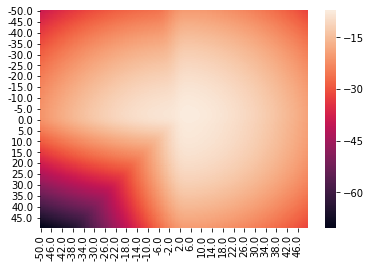

In [20]:
titrate(size=100,amount=0.5,l1_sig1=10.0,quds=['vicious',"swims"],possible_utterances=["shark","fish","man"],pred='shark',only_trivial=False,just_s1=False,just_l0=False,sig1=2.0,sig2=2.0,prior=False)